# **Deliverable 1**
### Dhun Jitendrakumar Jayswal
#### Extracting three months data {May, June and July}

In [32]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [46]:
#renaming the different dataframes from different csv files from 3 month data
dfDailyAM = pd.read_csv("DailyAM.csv")
dfDailyEnd = pd.read_csv("DailyEND.csv")
dfDailyPM = pd.read_csv("DailyPM.csv")
dffridayam = pd.read_csv('FridayAM.csv')


In [53]:
#printing the top 10 rows from the df
dfDailyEnd.head(10)
dffridayam.head()

,mbl_cod,rsp_id,ts,local_time,LOCATION_AM,DISCOMFORT_SLIDER,LIFE_SATISFACTION,HAPPINESS,PHYSICAL_HEALTH,MENTAL_HEALTH,...,PULSE_OX,HEART_RATE,RESPIRATION,BODY_BATTERY,STEPS,CALORIES,FLOORS,INTENSITY_MINUTES,AVG_AMP,VOX_ACTV
0,11822993,32680,1652455624,2022-05-13 10:27:04,2,1,5.0,6.0,7.0,7.0,...,0.0,88.46,0,0,0,0,0,0,0,0
1,11822993,32680,1653059534,2022-05-20 10:12:14,7,1,6.0,5.0,5.0,5.0,...,0.0,0.00,0,0,0,0,0,0,0,0
2,11822993,32680,1654876749,2022-06-10 10:59:09,4,1,7.0,11.0,11.0,11.0,...,0.0,0.00,0,0,0,0,0,0,0,0
3,11822993,32680,1656080335,2022-06-24 9:18:55,2,4,7.0,5.0,6.0,6.0,...,0.0,102.32,0,0,0,0,0,0,0,0
4,11822993,32680,1656691066,2022-07-01 10:57:46,2,1,6.0,6.0,5.0,7.0,...,0.0,0.00,0,0,0,0,0,0,0,0


In [48]:
dfDailyEnd.dtypes
dffridayam.dtypes


mbl_cod                int64
rsp_id                 int64
ts                     int64
local_time            object
DAILY_BREAKS           int64
LOCATION_END         float64
STRESS               float64
PULSE_OX             float64
HEART_RATE           float64
RESPIRATION            int64
BODY_BATTERY           int64
STEPS                  int64
CALORIES               int64
FLOORS                 int64
INTENSITY_MINUTES      int64
AVG_AMP                int64
VOX_ACTV               int64
dtype: object

In [55]:
#converting the data type from object to datetime
dfDailyEnd['local_time'] = pd.to_datetime(dfDailyEnd['local_time'])
dffridayam['local_time'] = pd.to_datetime(dffridayam['local_time'])

In [50]:
dfDailyEnd.dtypes

mbl_cod                       int64
rsp_id                        int64
ts                            int64
local_time           datetime64[ns]
DAILY_BREAKS                  int64
LOCATION_END                float64
STRESS                      float64
PULSE_OX                    float64
HEART_RATE                  float64
RESPIRATION                   int64
BODY_BATTERY                  int64
STEPS                         int64
CALORIES                      int64
FLOORS                        int64
INTENSITY_MINUTES             int64
AVG_AMP                       int64
VOX_ACTV                      int64
dtype: object

In [56]:
months = [5, 6, 7]  # Extracting the data for the months of May, June, and July
df_month = dfDailyEnd[dfDailyEnd['local_time'].dt.month.isin(months)]
dff_month = dffridayam[dffridayam['local_time'].dt.month.isin(months)]


In [57]:
df_month.head(10)

,mbl_cod,rsp_id,ts,local_time,DAILY_BREAKS,LOCATION_END,STRESS,PULSE_OX,HEART_RATE,RESPIRATION,BODY_BATTERY,STEPS,CALORIES,FLOORS,INTENSITY_MINUTES,AVG_AMP,VOX_ACTV
0,11822993,32680,1652130447,2022-05-09 16:07:27,4,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,11822993,32680,1652223137,2022-05-10 17:52:17,6,4.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,11822993,32680,1652303270,2022-05-11 16:07:50,4,2.0,0.0,0.0,87.0,0,0,0,0,0,0,0,0
3,11822993,32680,1652393888,2022-05-12 17:18:08,5,4.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
4,11822993,32680,1652738834,2022-05-16 17:07:14,6,5.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
5,11822993,32680,1652825473,2022-05-17 17:11:13,4,5.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
6,11822993,32680,1652911738,2022-05-18 17:08:58,4,7.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,11822993,32680,1653000475,2022-05-19 17:47:55,6,4.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
8,11822993,32680,1653344142,2022-05-23 17:15:42,4,4.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
9,11822993,32680,1653428734,2022-05-24 16:45:34,5,5.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


In [65]:
#Finding the average number of breaks taken by each rsp_id
df_avgbreaks = df_month.groupby('rsp_id')['DAILY_BREAKS'].mean().reset_index()
df_avgbreaks.head(20)

# df_florence1 = df_month.groupby('rsp_id')['fl']

,rsp_id,DAILY_BREAKS
0,32676,5.333333
1,32678,3.411765
2,32679,3.028571
3,32680,4.366667
4,32681,2.838710
5,32682,7.000000
6,32683,2.448276
7,32684,3.363636
8,32685,3.897436
9,32686,3.793103


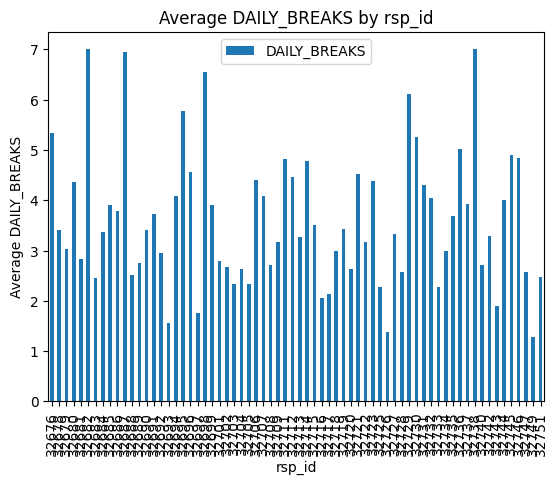

In [59]:
#plotting on bar graph
df_avgbreaks.plot(x='rsp_id', y='DAILY_BREAKS', kind='bar')
plt.xlabel('rsp_id')
plt.ylabel('Average DAILY_BREAKS')
plt.title('Average DAILY_BREAKS by rsp_id')
plt.show()

/var/folders/93/5sxkdql132l6lk6vf91111pm0000gn/T/ipykernel_6011/3936050188.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfavg=df_month.groupby(['rsp_id']).mean() #finding the avg breaks for each rsp_id


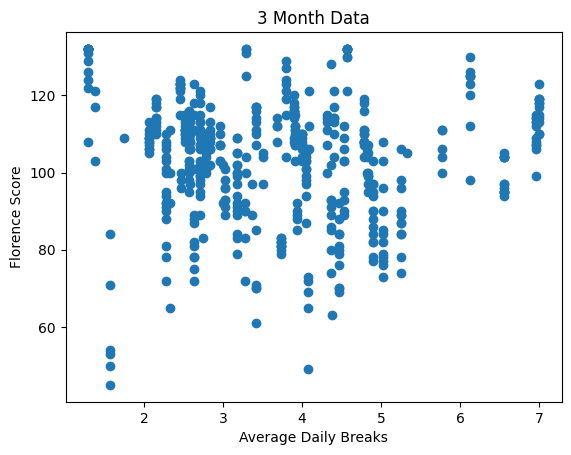

,mbl_cod_x,rsp_id,ts_x,local_time,LOCATION_AM,DISCOMFORT_SLIDER,LIFE_SATISFACTION,HAPPINESS,PHYSICAL_HEALTH,MENTAL_HEALTH,...,HEART_RATE_y,RESPIRATION_y,BODY_BATTERY_y,STEPS_y,CALORIES_y,FLOORS_y,INTENSITY_MINUTES_y,AVG_AMP_y,VOX_ACTV_y,florence_score
0,55448394.0,32676,1.652450e+09,2022-05-13 9:47:51,2.0,1.0,8.0,8.0,8.0,8.0,...,22.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0
1,80515680.0,32678,1.652450e+09,2022-05-13 9:47:51,7.0,1.0,5.0,4.0,5.0,6.0,...,11.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
2,80515680.0,32678,1.653054e+09,2022-05-20 9:36:31,7.0,1.0,3.0,3.0,3.0,4.0,...,11.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
3,80515680.0,32678,1.653660e+09,2022-05-27 10:07:36,2.0,1.0,6.0,7.0,4.0,4.0,...,11.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,80515680.0,32678,1.654268e+09,2022-06-03 10:58:55,2.0,2.0,7.0,8.0,6.0,7.0,...,11.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0
5,80515680.0,32678,1.655472e+09,2022-06-17 9:15:25,2.0,1.0,6.0,5.0,5.0,4.0,...,11.705882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0
6,66999191.0,32679,1.652456e+09,2022-05-13 10:27:04,1.0,1.0,7.0,7.0,5.0,8.0,...,70.559714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
7,66999191.0,32679,1.653056e+09,2022-05-20 9:12:14,7.0,2.0,8.0,8.0,6.0,8.0,...,70.559714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
8,66999191.0,32679,1.654269e+09,2022-06-03 10:16:35,1.0,2.0,8.0,8.0,6.0,8.0,...,70.559714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0
9,66999191.0,32679,1.654877e+09,2022-06-10 10:59:09,1.0,2.0,8.0,9.0,7.0,8.0,...,70.559714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0


In [79]:
dfavg=df_month.groupby(['rsp_id']).mean() #finding the avg breaks for each rsp_id

mergeddf=pd.merge(dffridayam, dfavg, on='rsp_id', how="right") #merge the dataframes

#calculate the florence scores (just adds all of them up)
mergeddf["florence_score"]=mergeddf["LIFE_SATISFACTION"]+mergeddf["HAPPINESS"]+mergeddf["PHYSICAL_HEALTH"]+mergeddf["MENTAL_HEALTH"]+mergeddf["WORTHWHILE"]+mergeddf["PURPOSE"]+mergeddf["PROMOTE_GOOD"]+mergeddf["DELAYED_HAPPINESS"]+mergeddf["CONTENT_RELATIONSHIPS"]+mergeddf["SATISFYING_RELATIONSHIPS"]+mergeddf["LIVING_EXPENSES"]+mergeddf["FOOD_HOUSING"]

#scatter plot
plt.scatter(mergeddf['DAILY_BREAKS'], mergeddf['florence_score'])
plt.xlabel("Average Daily Breaks") #x label
plt.ylabel("Florence Score") #y label
plt.title("3 Month Data")
plt.show()

mergeddf.head(20)


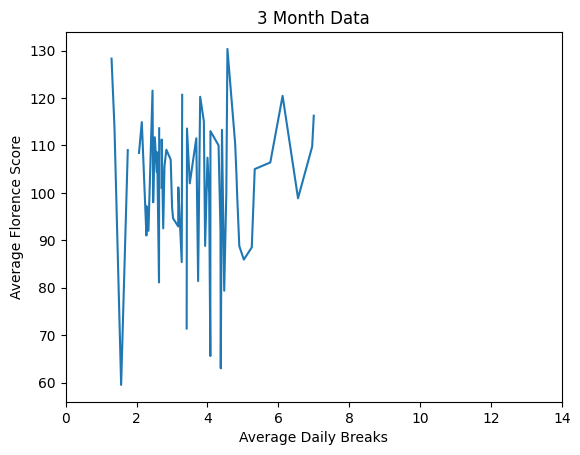

In [73]:
import numpy as np

# group by number of breaks and calculate average Florence score
grouped = mergeddf.groupby('DAILY_BREAKS')['florence_score'].mean()


# create bar graph
plt.plot(grouped.index, grouped)
plt.xlabel("Average Daily Breaks")
plt.ylabel("Average Florence Score")
plt.title("3 Month Data")
plt.xticks(np.arange(0, 16, 2)) # set x-axis tick marks to every 2 breaks
plt.show()


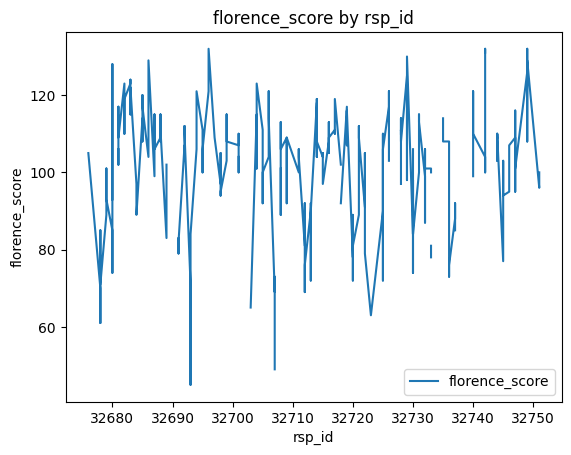

In [77]:
mergeddf.plot(x='rsp_id', y='florence_score', kind='line')
plt.xlabel('rsp_id')
plt.ylabel('florence_score')
plt.title('florence_score by rsp_id')
plt.show()